# Лабораторна робота №4

In [1]:
#імпорт необхідних бібліотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%precision 2
np.set_printoptions(suppress=True)
from copy import deepcopy

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.cluster import OPTICS
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

## 1 датасет

### Препроцесінг і візуалізація

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(900000, factor =.1 , noise=.1)

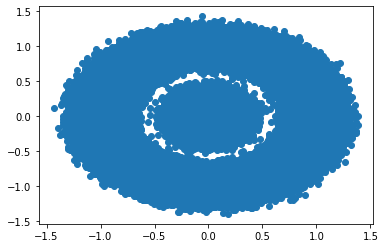

In [4]:
#візуалізація датасету у вигляді точкового графіку
plt.scatter(X[:, 0], X[:, 1]);

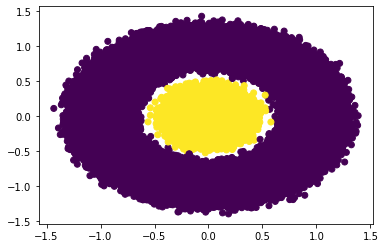

In [5]:
#"правильна" кластеризація
plt.scatter(X[:, 0], X[:, 1], c=y);

### Побудова моделей кластеризації

Маємо 2 кластери, тому будемо намагатися підібрати саме таку модель

Алгоритм OPTICS хоч і зазвичай показує велику точність, проте є надзвичайно повільним (в чому можна впевнетись в документації бібліотеки sklearn), і оскільки ресурсів апаратного забезпечення не вистачає, щоб навчити хоча б 1 модель за 12 годин навіть при зміні методу кластеризації і рівня надійності xi. Можна було б навчати модель на малих підвібірках даних і перевіряти його дієздатність на усьому датасеті, проте об'єкти класу OPTICS не мають методу predict, тільки метод fit_predict. Тому, на жаль вимушені, визнати алгоритм неоптимальним на таких великих обсягах даних. Зменшимо кількість даних до 1000

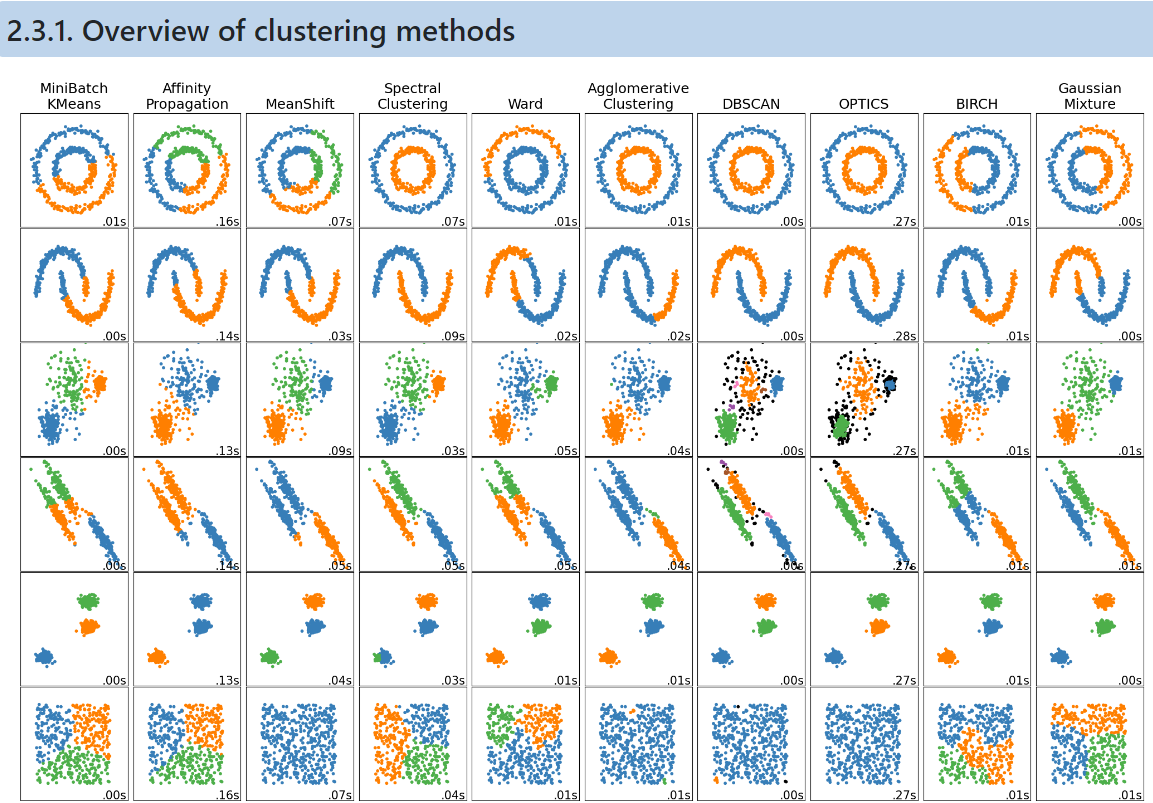

Бачимо, що OPTICS найбільш повільний алгоритм серед основних алгоритмів кластеризації

In [14]:
X, y = make_circles(1000, factor =.1 , noise=.1)

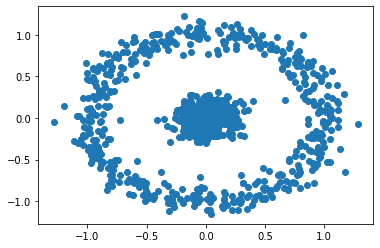

In [15]:
#візуалізація датасету у вигляді точкового графіку
plt.scatter(X[:, 0], X[:, 1]);

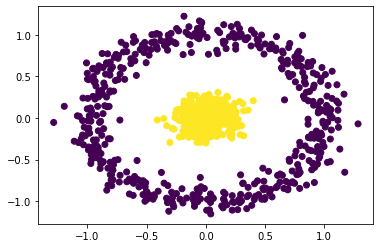

In [16]:
#"правильна" кластеризація
plt.scatter(X[:, 0], X[:, 1], c=y);

In [32]:
#функції для візуалізації проведеної кластеризації та підрахунку метрик

def plot_clusters(X, predict_values):
    plt.scatter(X[:, 0], X[:, 1], c = predict_values)
    plt.show()
    
def metrics(X, y, predict_values):
    print('Adjusted rand score: ', adjusted_rand_score(y, predict_values))
    print('Adjusted mutual info score: ', adjusted_mutual_info_score(y, predict_values))
    print('Silhouette score: ', silhouette_score(X, predict_values))

Побудова першої моделі

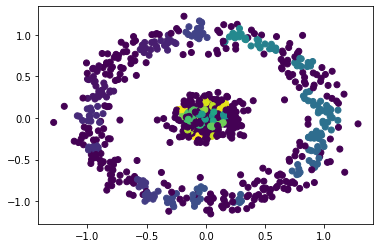

Wall time: 13.3 s


In [33]:
%%time
crcl_1 = OPTICS(n_jobs=-1)
predict_values_crcl_1 = crcl_1.fit_predict(X)
plot_clusters(X, predict_values_crcl_1)

In [34]:
metrics(X, y, predict_values_crcl_1)

Adjusted rand score:  0.009444466396850546
Adjusted mutual info score:  0.18674780127993662
Silhouette score:  -0.22707760664463375


In [35]:
crcl_1.cluster_hierarchy_.shape

(72, 2)

Бачимо, що дефолтна модель дає дуже погані результати(зокрема підраховує аж 72 кластери). Спробуєио змінити гіперпараметри. Зокрема мінімальний розмір кластера та метрики (зараз використовується відстань Міньковського, проте вона дорівнює відстані Евкліда)

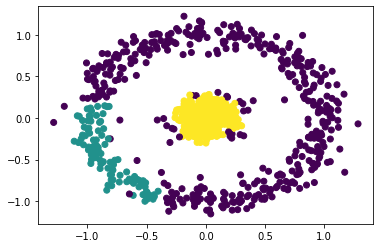

Wall time: 13.2 s


In [36]:
%%time
crcl_2 = OPTICS(metric='manhattan', n_jobs=-1, min_cluster_size=0.1)
predict_values_crcl_2 = crcl_2.fit_predict(X)
plot_clusters(X, predict_values_crcl_2)

In [37]:
metrics(X, y, predict_values_crcl_2)

Adjusted rand score:  0.7556184488417008
Adjusted mutual info score:  0.732250950513613
Silhouette score:  0.33413429557252233


Бачимо очевидне покращення результатів. Спробуємо зміною min_cluster_size і за допомогою значень Silhouette score підібрати Estimated number of clusters

In [31]:
dctr_of_scores = {}
for i in range(1, 11):
    crcl_model = OPTICS(n_jobs=-1, min_cluster_size=0.05*i)
    dctr_of_scores[i] = silhouette_score(X, crcl_model.fit_predict(X))
dctr_of_scores

{1: -0.21063584780867672,
 2: 0.3181056621996269,
 3: 0.36153327700220095,
 4: 0.36153327700220095,
 5: 0.06949676036607813,
 6: 0.06949676036607813,
 7: 0.06949676036607813,
 8: 0.06949676036607813,
 9: 0.06949676036607813,
 10: 0.2837733636855249}

Побудуємо відповідно моделі з min_cluster_size = 0.15, 0.2 і 0.5, при цьому використовуючи різні метрики відстані

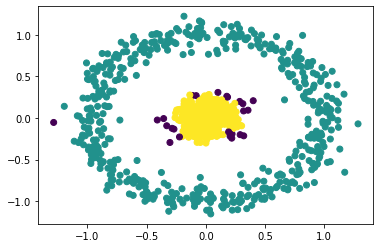

Wall time: 14.4 s


In [38]:
%%time
crcl_3 = OPTICS(metric='cityblock', n_jobs=-1, min_cluster_size=0.15) 
predict_values_crcl_3 = crcl_3.fit_predict(X)
plot_clusters(X, predict_values_crcl_3)

In [39]:
metrics(X, y, predict_values_crcl_3)

Adjusted rand score:  0.9521618347642159
Adjusted mutual info score:  0.9274025136966382
Silhouette score:  0.11548144168138837


Візуально кластеризація майже ідеальна, проте через наявність зайвого кластера метрика Silhouette score показує низький результат

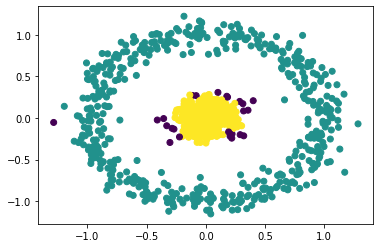

Wall time: 13.7 s


In [40]:
%%time
crcl_4 = OPTICS(metric='l1', n_jobs=-1, min_cluster_size=0.2) 
predict_values_crcl_4 = crcl_4.fit_predict(X)
plot_clusters(X, predict_values_crcl_4)

In [41]:
metrics(X, y, predict_values_crcl_4)

Adjusted rand score:  0.9521618347642159
Adjusted mutual info score:  0.9274025136966382
Silhouette score:  0.11548144168138837


Результат аналогічний попередньому

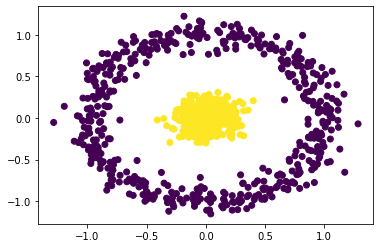

Wall time: 14.4 s


In [42]:
%%time
crcl_5 = OPTICS(metric='l2', n_jobs=-1, min_cluster_size=0.5) 
predict_values_crcl_5 = crcl_5.fit_predict(X)
plot_clusters(X, predict_values_crcl_5)

In [43]:
metrics(X, y, predict_values_crcl_5)

Adjusted rand score:  1.0
Adjusted mutual info score:  1.0
Silhouette score:  0.2837733636855249


Візуально отримали найкращу модель, проте за допомогою решітчатого пошуку спробуємо максимізувати метрику Silhouette score, та подивимося, чи втратимо ми в якості кластеризації

In [46]:
def silhouette_score_func(estimator, X):
    clusters = estimator.fit_predict(X)
    score = metrics.silhouette_score(distance_matrix, clusters, metric='precomputed')
    return score

from sklearn.model_selection import GridSearchCV
parameters = {'metric'       :  ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'],
              'cluster_method': ['xi', 'dbscan'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
best_crcl = OPTICS(n_jobs=-1, min_cluster_size=0.5)
best_crcl = GridSearchCV(best_crcl, parameters, scoring=silhouette_score_func)

In [49]:
%%time
best_crcl.fit(X)

Wall time: 40min 16s


GridSearchCV(estimator=OPTICS(min_cluster_size=0.5, n_jobs=-1),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'cluster_method': ['xi', 'dbscan'],
                         'metric': ['cityblock', 'cosine', 'euclidean', 'l1',
                                    'l2', 'manhattan']},
             scoring=<function silhouette_score_func at 0x0000014200E5E3A0>)

In [50]:
best_crcl.best_params_

{'algorithm': 'auto', 'cluster_method': 'xi', 'metric': 'cityblock'}

In [51]:
best_crcl = best_crcl.best_estimator_

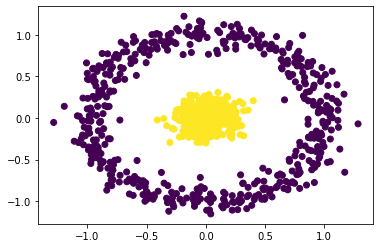

In [53]:
predict_values_crcl_6 = best_crcl.fit_predict(X)
plot_clusters(X, predict_values_crcl_6)

In [54]:
metrics(X, y, predict_values_crcl_6)

Adjusted rand score:  1.0
Adjusted mutual info score:  1.0
Silhouette score:  0.2837733636855249


Знову ж таки кластеризація візуально "правильна", проте Silhouette score не вдається максимізувати

Перевіримо стійкійсть кластеризації щодо перетасування даних

In [57]:
X_sample = pd.DataFrame(X).sample(frac=1)

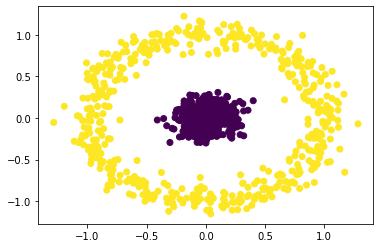

In [62]:
predict_values_crcl_7 = best_crcl.fit_predict(X_sample)
plot_clusters(np.array(X_sample), predict_values_crcl_7)

Бачимо, що результати кластеризації не змінилися. Отже алгоритм є стійким до тасування даних

# 2 датасет

In [64]:
from sklearn.datasets import make_blobs
n_samples_1 = 1000
n_samples_2 = 700
centers = [[0.0, 0.0] , [3.5, 3.5]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2], \
                  centers=centers, cluster_std=clusters_std, \
                  random_state=0, shuffle=False)

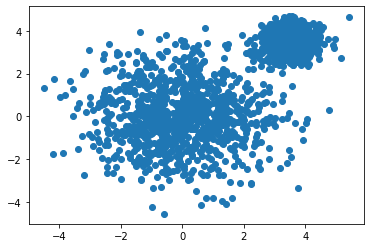

In [65]:
#візуалізація датасету у вигляді точкового графіку
plt.scatter(X[:, 0], X[:, 1]);

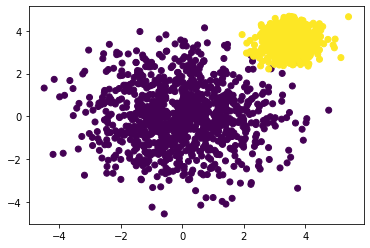

In [66]:
#"правильна" кластеризація
plt.scatter(X[:, 0], X[:, 1], c=y);

### Побудова моделей кластеризації

Побудова першої моделі

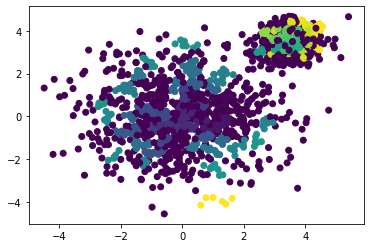

Wall time: 12.9 s


In [67]:
%%time
blobs_1 = OPTICS(n_jobs=-1)
predict_values_blobs_1 = blobs_1.fit_predict(X)
plot_clusters(X, predict_values_blobs_1)

In [68]:
metrics(X, y, predict_values_blobs_1)

Adjusted rand score:  0.017917903715103836
Adjusted mutual info score:  0.17054895736020736
Silhouette score:  -0.19565944494806517


In [69]:
blobs_1.cluster_hierarchy_.shape

(135, 2)

Дефолтна модель дає аж 135 кластерів. Застосуємо такий же підхід, як і до минулого датасету, тобто спробуємо зміною min_cluster_size і за допомогою значень Silhouette score підібрати Estimated number of clusters

In [70]:
dctr_of_scores = {}
for i in range(1, 11):
    blobs_model = OPTICS(n_jobs=-1, min_cluster_size=0.05*i)
    dctr_of_scores[i] = silhouette_score(X, blobs_model.fit_predict(X))
dctr_of_scores

{1: 0.5014878219371061,
 2: 0.5014878219371061,
 3: 0.5014878219371061,
 4: 0.5014878219371061,
 5: 0.5014878219371061,
 6: 0.5014878219371061,
 7: 0.5014878219371061,
 8: 0.6162405714337247,
 9: 0.332641874959186,
 10: 0.332641874959186}

Побудуємо моделі з min_cluster_size=0.4, використовуючи різні метрики

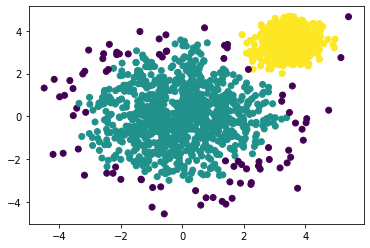

Wall time: 11.6 s


In [71]:
%%time
blobs_2 = OPTICS(metric='manhattan', n_jobs=-1, min_cluster_size=0.4) 
predict_values_blobs_2 = blobs_2.fit_predict(X)
plot_clusters(X, predict_values_blobs_2)

In [72]:
metrics(X, y, predict_values_blobs_2)

Adjusted rand score:  0.8759980052791225
Adjusted mutual info score:  0.8490012655039378
Silhouette score:  0.5420731766997892


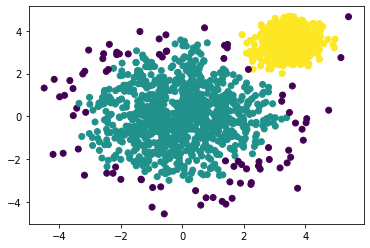

Wall time: 11.2 s


In [73]:
%%time
blobs_3 = OPTICS(metric='cityblock', n_jobs=-1, min_cluster_size=0.4) 
predict_values_blobs_3 = blobs_3.fit_predict(X)
plot_clusters(X, predict_values_blobs_3)

In [74]:
metrics(X, y, predict_values_blobs_3)

Adjusted rand score:  0.8759980052791225
Adjusted mutual info score:  0.8490012655039378
Silhouette score:  0.5420731766997892


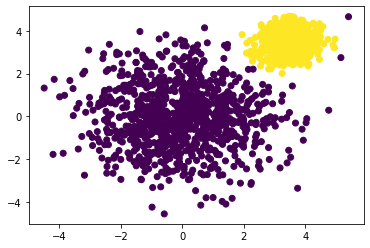

Wall time: 10.8 s


In [75]:
%%time
blobs_4 = OPTICS(metric='l2', n_jobs=-1, min_cluster_size=0.4) 
predict_values_blobs_4 = blobs_4.fit_predict(X)
plot_clusters(X, predict_values_blobs_4)

In [76]:
metrics(X, y, predict_values_blobs_4)

Adjusted rand score:  0.9812374294613292
Adjusted mutual info score:  0.956866549757762
Silhouette score:  0.6162405714337247


Бачимо, що така кластеризація є майже ідеальною. Спробуємо піжібрати кращу модель

In [77]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'metric'       :  ['cosine', 'euclidean', 'l1', 'l2'],
              'cluster_method': ['xi', 'dbscan'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
best_blobs = OPTICS(n_jobs=-1, min_cluster_size=0.4)
best_blobs = RandomizedSearchCV(best_blobs, parameters, scoring=silhouette_score_func)

In [79]:
%%time
best_blobs.fit(X)

Wall time: 9min 28s


RandomizedSearchCV(estimator=OPTICS(min_cluster_size=0.4, n_jobs=-1),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'cluster_method': ['xi', 'dbscan'],
                                        'metric': ['cosine', 'euclidean', 'l1',
                                                   'l2']},
                   scoring=<function silhouette_score_func at 0x0000014200E5E3A0>)

In [80]:
best_blobs.best_params_

{'metric': 'l2', 'cluster_method': 'xi', 'algorithm': 'auto'}

In [83]:
best_blobs = best_blobs.best_estimator_

Бачимо, що це той сама модель, що була побудована на минулому кроці.

Перевіримо стійкійсть кластеризації щодо перетасування даних

In [81]:
X_sample = pd.DataFrame(X).sample(frac=1)

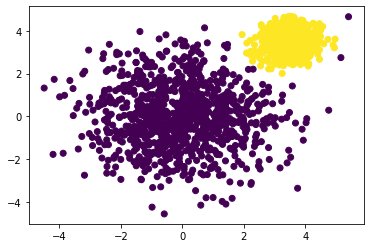

In [84]:
predict_values_blobs_5 = best_blobs.fit_predict(X_sample)
plot_clusters(np.array(X_sample), predict_values_blobs_5)

# Висновки

У ході виконання лабораторної роботи з'ясували, що OPTICS є дуже потужним алгоритмом, який можна покращувати за допомогою параметрів min_cliuster_size i metric, він не залежить від розташуання даних та може вирішувати складні задачі. Із очевидних мінусів - швидкодія алгоритму. На мою думку, алгоритм варто використовувати, коли треба максимізовувати точність, в інших випадках краще використовувати алгоритми, які потребують меншої апаратної потужності (той же DBSCAN)